<a href="https://colab.research.google.com/github/Anabda/sprint-4/blob/main/Dataset/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Realização da modelagem para o dataset de doença cardíaca

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

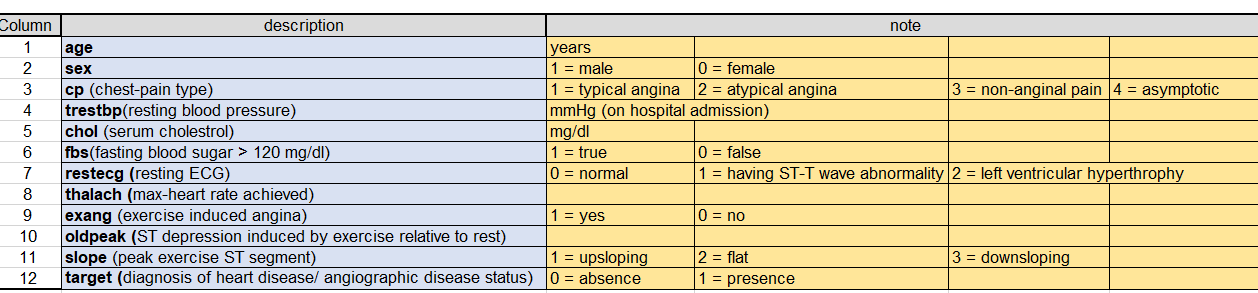

In [2]:
# URL download do arquivo do dataset https://www.kaggle.com/datasets/durgesh2050/heart-disease-predication
# O dataset relaciona alguns dados médicos de pacientes ao risco cardíaco do paciente, de acordo com o exibido pela imagem acima
url = "https://raw.githubusercontent.com/Anabda/sprint-4/main/Dataset/Doencas_coracao.csv"

dataset = pd.read_csv(url, delimiter=',')
dataset=dataset.dropna()

# Mostra as primeiras linhas do dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0.0,0.0,1,0
1,49,0,3,160,180,0,0,156,0.0,1.0,2,1
2,37,1,2,130,283,0,1,98,0.0,0.0,1,0
3,48,0,4,138,214,0,0,108,1.0,1.5,2,1
4,54,1,3,150,195,0,0,122,0.0,0.0,1,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
#o x e o y estão selecionando os dados do dataset que você está pegando; o x são as entradas e o y é a saída (classificação)
array = dataset.values
X = array[:,0:11]
y = array[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.544536 (0.021897)
CART: 0.923105 (0.015521)
NB: 0.684970 (0.018308)
SVM: 0.561399 (0.033694)


[Text(1, 0, 'KNN'), Text(2, 0, 'CART'), Text(3, 0, 'NB'), Text(4, 0, 'SVM')]

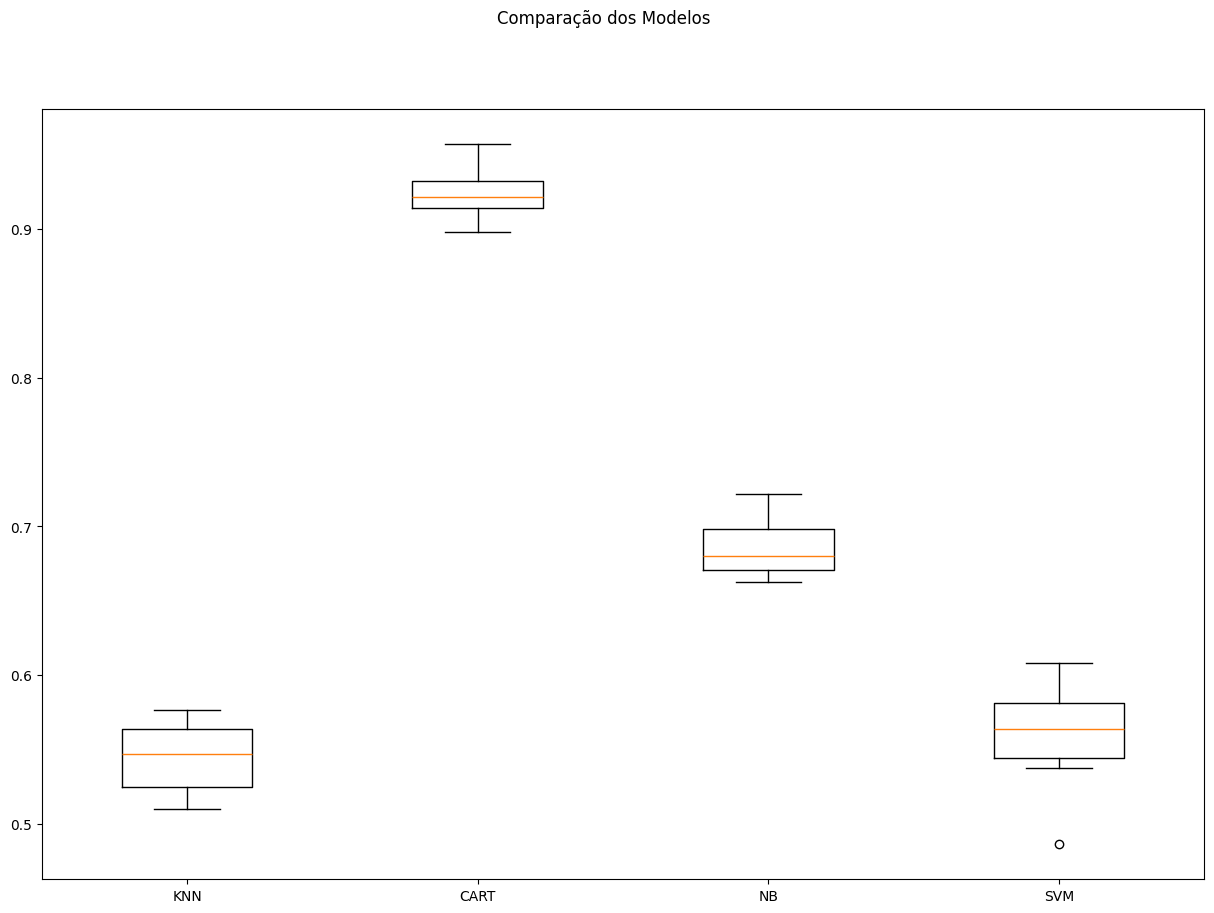

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
#plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.545 (0.022)
CART-orig: 0.923 (0.016)
NB-orig: 0.685 (0.018)
SVM-orig: 0.561 (0.034)
KNN-padr: 0.830 (0.021)
CART-padr: 0.922 (0.019)
NB-padr: 0.685 (0.018)
SVM-padr: 0.808 (0.032)
KNN-norm: 0.831 (0.017)
CART-norm: 0.923 (0.019)
NB-norm: 0.685 (0.018)
SVM-norm: 0.789 (0.028)


[Text(1, 0, 'KNN-orig'),
 Text(2, 0, 'CART-orig'),
 Text(3, 0, 'NB-orig'),
 Text(4, 0, 'SVM-orig'),
 Text(5, 0, 'KNN-padr'),
 Text(6, 0, 'CART-padr'),
 Text(7, 0, 'NB-padr'),
 Text(8, 0, 'SVM-padr'),
 Text(9, 0, 'KNN-norm'),
 Text(10, 0, 'CART-norm'),
 Text(11, 0, 'NB-norm'),
 Text(12, 0, 'SVM-norm')]

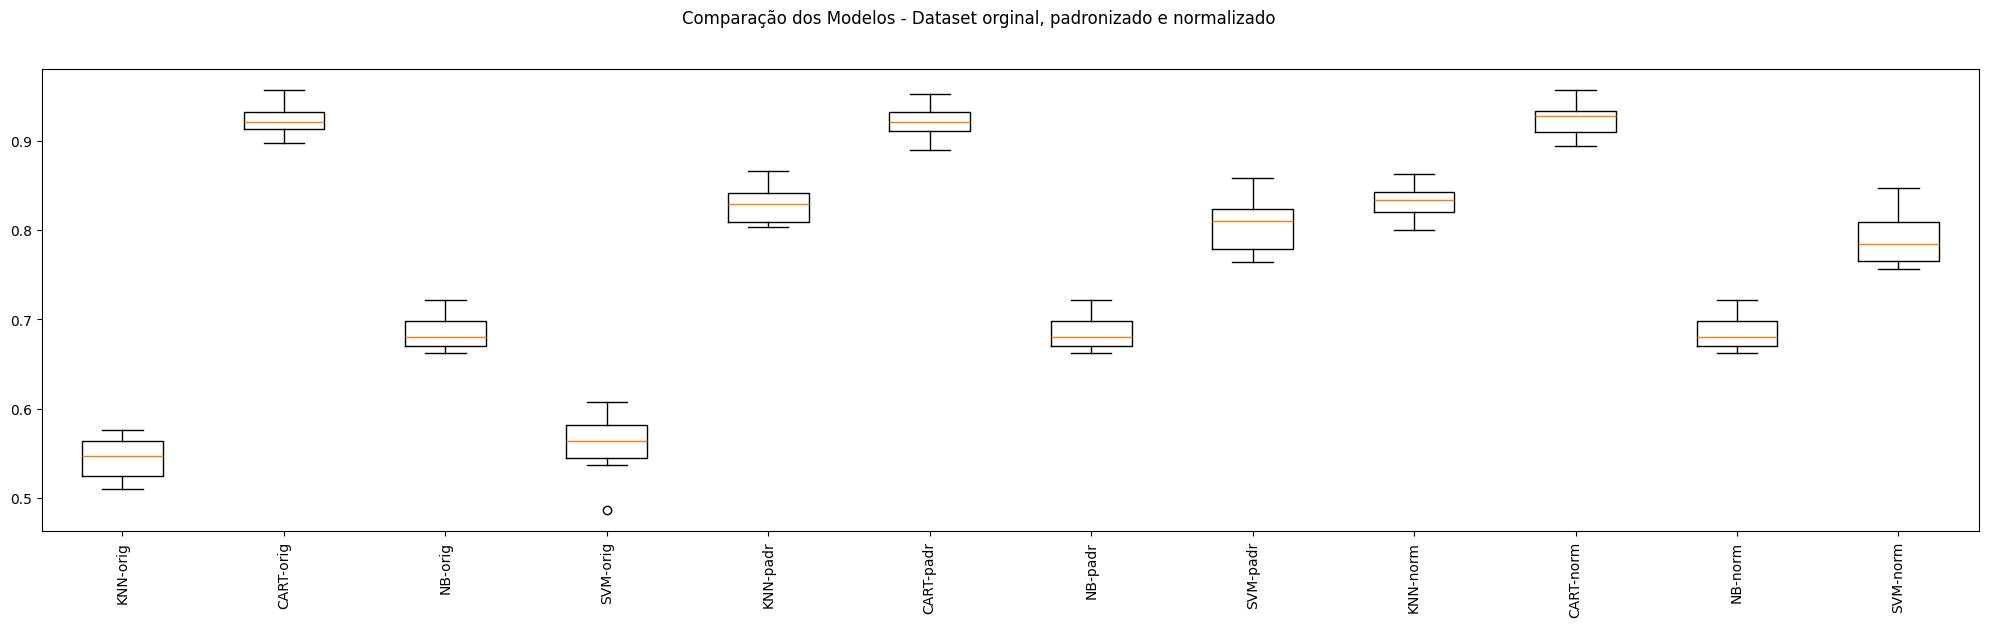

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
#plt.show()

### Otimização dos hiperparâmetros

In [ ]:
# Percebe-se que o CART é o melhor modelo, com 92,3% de acurácia e 1,9% de desvio padrão originalmente, agora vamos tentar melhorar a acurácia com a alteração dos parâmetros
# Definindo os hiperparâmetros para ajustes
parametros = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Criando uma instância do modelo CART
cart_model = DecisionTreeClassifier(random_state=seed)
model_name='doenca_cardiaca'

# Criando uma instância do GridSearchCV
grid_search = GridSearchCV(cart_model, parametros, scoring='accuracy', cv=kfold)

# Ajustando o modelo aos dados de treino
grid_search.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros Encontrados:")
print(grid_search.best_params_)

# Obtendo o melhor modelo após o tuning
best_cart_model = grid_search.best_estimator_

# Avaliando o desempenho do melhor modelo no conjunto de teste
y_pred_best = best_cart_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Acurácia do Melhor Modelo CART no Conjunto de Teste: {accuracy_best:.3f}')
# Obtendo o desvio padrão da acurácia durante a validação cruzada
std_accuracy = grid_search.cv_results_['std_test_score'][grid_search.best_index_]
print(f'Desvio Padrão da Acurácia durante a Validação Cruzada: {std_accuracy:.3f}')

Melhores Hiperparâmetros Encontrados:
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Acurácia do Melhor Modelo CART no Conjunto de Teste: 0.944
Desvio Padrão da Acurácia durante a Validação Cruzada: 0.018


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, max_features = None, min_samples_leaf = 1, min_samples_split = 2, splitter = 'best')
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9404388714733543


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.scaler = scaler
model.fit(rescaledX, y)

DecisionTreeClassifier(criterion='entropy')

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'age':  [20, 70, 50, 50],
        'sex': [0, 1, 1, 1],
        'pain': [4, 1, 4, 2],
        'pressure': [120, 190, 240, 145],
        'chol':  [180, 240, 300, 180],
        'sugar': [0, 0, 1, 1],
        'ecg': [0, 1, 0, 0],
        'heart_rate': [90, 90, 120, 120],
        'angina':  [0, 1, 0, 1],
        'st_rest': [0, 0, 2, 0.7],
        'st_peak': [0, 0, 1, 2]
        }

#atributos = ['age','sex','pain','pressure','chol','sugar','ecg','heart_rate','angina','st_rest','st_peak']
#entrada = pd.DataFrame(data, columns=atributos)

entrada = pd.DataFrame(data)
array_entrada = entrada.values

X_entrada = array_entrada[:,0:11].astype(float)
print(X_entrada)
# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)

[[ 20.    0.    4.  120.  180.    0.    0.   90.    0.    0.    0. ]
 [ 70.    1.    1.  190.  240.    0.    1.   90.    1.    0.    0. ]
 [ 50.    1.    4.  240.  300.    1.    0.  120.    0.    2.    1. ]
 [ 50.    1.    2.  145.  180.    1.    0.  120.    1.    0.7   2. ]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 0. 0. 1.]


##Salvando o modelo com a biblioteca pickle

In [ ]:
#por conta da necessidade de salvar o modelo em uma pasta para a api poder ter acesso, essa parte ao rodar no Colab vai acabar dando erro, pois não vai existir o path inserido abaixo.
#Ao rodar o programa no visual studio não ocorrerá erros.
artifact_pkl_filename = model_name+'.pkl'
pkl_local_path = '../mvp_api/ml_model/'+artifact_pkl_filename
with open(pkl_local_path,'wb') as model_file:
  pickle.dump(model,model_file)

##Carregando o modelo

In [ ]:
loaded_pkl_model = pickle.load(open(pkl_local_path,'rb'))

pkl_results = loaded_pkl_model.predict(rescaledTestX)
print('Pickle: ', accuracy_score(y_test, pkl_results))


Pickle:  0.9937304075235109


## Conclusões

Após carga dos dados e análise de acurácia usando diversos modelos, a melhor acurácia encontrada foi usando o modelo CART, conforme explicado no tópico otimização de hiperparâmetros.
Assim, o modelo foi otimizado para verificar quais os melhores parâmetros para os dados inseridos e em seguida testado com os dados que foram separados inicialmente para testes.
Além disso, caso fosse necessário usar um outro modelo que não o CART, nota-se que após a padronização e normalização dos dados, os modelos em geral atingiram um nível razoável de acurácia.